In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [3]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [4]:
test["Survived"] = np.nan
submissionIds = pd.DataFrame(test["PassengerId"])

ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train,test)).reset_index(drop=True)

print("all_data siaze is:{}".format(all_data.shape))

all_data siaze is:(1309, 12)


In [5]:
#profile = ProfileReport(all_data, title="Titanic Data", explorative=True)

#profile.to_file("Titanic_Data_Profile.html")

In [6]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
all_data.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
all_data[all_data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


&lt;seaborn.axisgrid.FacetGrid at 0x7fe901c26370&gt;

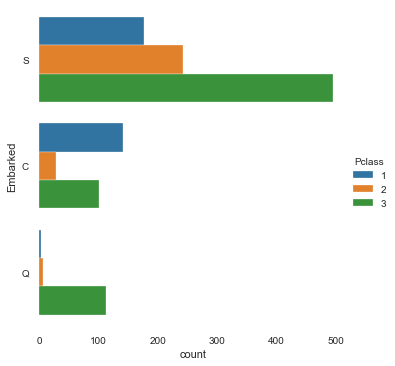

In [9]:
sns.catplot(y='Embarked', hue='Pclass', kind='count', data=all_data)

In [10]:
#all_data.drop(['Embarked'], axis=1, inplace=True)
all_data.Embarked[all_data.Embarked.isnull() == True] = 'C'

In [11]:
all_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1309
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [12]:
#all_data[all_data['Fare']==0]
#all_data[all_data['Fare'].isnull()]

In [13]:
all_data[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [14]:
all_data.Fare[(all_data.Fare == 0) & (all_data.Pclass == 1)] = 87.50
all_data.Fare[(all_data.Fare == 0) & (all_data.Pclass == 2)] = 21.18
all_data.Fare[(all_data.Fare == 0) & (all_data.Pclass == 3)] = 13.30
all_data.Fare[(all_data.Fare.isnull()) & (all_data.Pclass == 3)] = 13.30

In [15]:
all_data.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
347077           7
S.O.C. 14879     7
                ..
367229           1
C 17368          1
349254           1
359306           1
219533           1
Name: Ticket, Length: 929, dtype: int64

In [16]:
all_data['TicketsPerGroup'] = all_data.groupby(['Ticket'])['Fare'].transform('count')
all_data['FarePP'] = all_data['Fare'] / all_data['TicketsPerGroup']

all_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,TicketsPerGroup,FarePP
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.885842,2.101604,15.232465
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.769491,1.779832,14.237380
min,0.000000,1.000000,0.170000,0.000000,0.000000,3.170800,1.000000,3.170800
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000,1.000000,7.650000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000,1.000000,8.112500
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.387500,3.000000,15.579200
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,11.000000,128.082300


In [17]:
all_data.drop(['TicketsPerGroup'], axis=1, inplace=True)

In [18]:
all_data["Surname"] = all_data.Name.str.extract('([A-Za-z]+)\,', expand = False)
all_data['Surname']

0          Braund
1         Cumings
2       Heikkinen
3        Futrelle
4           Allen
          ...    
1304      Spector
1305        Ocana
1306      Saether
1307         Ware
1308        Peter
Name: Surname, Length: 1309, dtype: object

In [19]:
all_data['FamilyGroupID'] = all_data.agg(lambda x: f"{x['Surname']}-{x['Pclass']}-{x['Embarked']}-{x['Ticket']}", axis=1)

all_data.FamilyGroupID.value_counts()

Sage-3-S-CA. 2343       11
Goodwin-3-S-CA 2144      8
Asplund-3-S-347077       7
Andersson-3-S-347082     7
Fortune-1-S-19950        6
                        ..
Veal-2-S-28221           1
Weir-1-S-113800          1
Givard-2-S-250646        1
Sirota-3-S-392092        1
Harris-2-S-W/C 14208     1
Name: FamilyGroupID, Length: 1024, dtype: int64

In [20]:
all_data['FamilySize'] = all_data.groupby(['FamilyGroupID'])['Surname'].transform('count') 

all_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FarePP,Surname,FamilyGroupID,FamilySize
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1309.000000,295,1309,1309.000000,1309,1309,1309.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN,872,1024,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,Sage,Sage-3-S-CA. 2343,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN,11,11,NaN
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.885842,NaN,NaN,15.232465,NaN,NaN,1.779221
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.769491,NaN,NaN,14.237380,NaN,NaN,1.548205
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,3.170800,NaN,NaN,3.170800,NaN,NaN,1.000000
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,7.650000,NaN,NaN,1.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN,8.112500,NaN,NaN,1.000000
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.387500,NaN,NaN,15.579200,NaN,NaN,2.000000


In [21]:
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [22]:
all_data["Title"] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

all_data['Title'] = all_data['Title'].replace(['Sir', 'Countess', 'Lady', 'Col', 'Major', 'Dr', 'Jonkheer', 'Don', 
                                               'Dona', 'Rev', 'Capt'], 'Rare')
all_data['Title'] = all_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
all_data['Title'] = all_data['Title'].replace('Mme', 'Mrs')

all_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [23]:
all_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FarePP,Surname,FamilyGroupID,FamilySize,Title
count,891.000000,1309.000000,1309,1309,1046.000000,1309,1309.000000,295,1309,1309.000000,1309,1309,1309.000000,1309
unique,NaN,NaN,1307,2,NaN,929,NaN,186,3,NaN,872,1024,NaN,5
top,NaN,NaN,"Kelly, Mr. James",male,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,Sage,Sage-3-S-CA. 2343,NaN,Mr
freq,NaN,NaN,2,843,NaN,11,NaN,6,914,NaN,11,11,NaN,757
mean,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.885842,NaN,NaN,15.232465,NaN,NaN,1.779221,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.769491,NaN,NaN,14.237380,NaN,NaN,1.548205,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,NaN,3.170800,NaN,NaN,3.170800,NaN,NaN,1.000000,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.925000,NaN,NaN,7.650000,NaN,NaN,1.000000,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.500000,NaN,NaN,8.112500,NaN,NaN,1.000000,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.387500,NaN,NaN,15.579200,NaN,NaN,2.000000,NaN


all_data["Cabin"] = all_data.Cabin.str.extract('(^([A-Z]))', expand = False)

all_data.Cabin[all_data.Cabin.isnull() == True] = 'Unk'

all_data[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sns.barplot(all_data['Cabin'], all_data['Survived']);

In [24]:
all_data.drop(['Ticket', 'Name', 'Surname', 'Fare','FamilyGroupID'], axis=1, inplace=True)

In [25]:
#pd.options.display.float_format = "{:,.2f}".format

#all_data.head()

In [26]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.558824
1,Q,0.389610
2,S,0.336957


In [27]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


&lt;matplotlib.legend.Legend at 0x7fe90a58f2e0&gt;

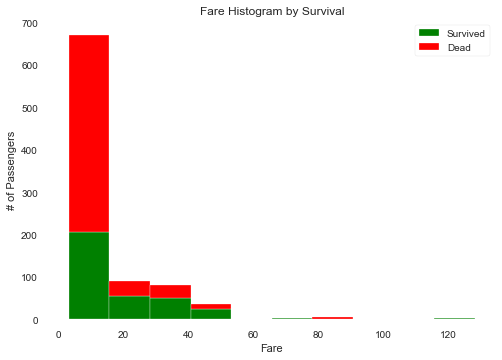

In [28]:
plt.hist(x = [all_data[all_data['Survived']==1]['FarePP'],
        all_data[all_data['Survived']==0]['FarePP']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('# of Passengers')
plt.legend()

all_data['FareBand'] = pd.cut(all_data['FarePP'],12)
all_data = MultiColumnLabelEncoder(columns=['FareBand']).fit_transform(all_data)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

all_data.drop(['FarePP'], axis=1, inplace=True)

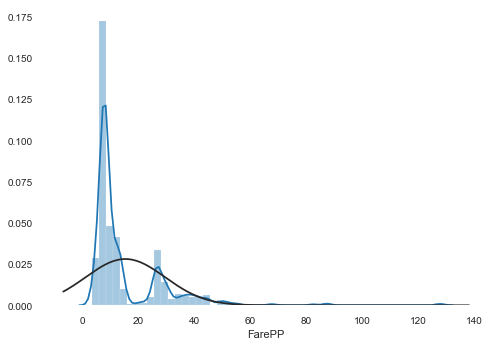

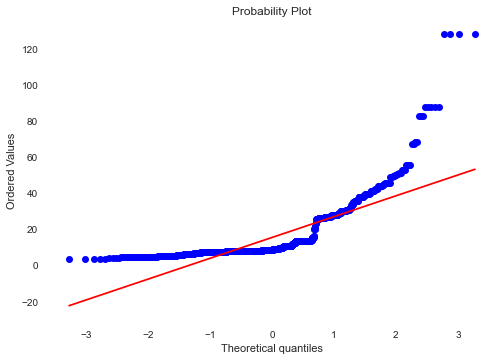

In [29]:
from scipy import stats
from scipy.stats import norm

#histogram and normal probability plot
sns.distplot(all_data['FarePP'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['FarePP'], plot=plt)

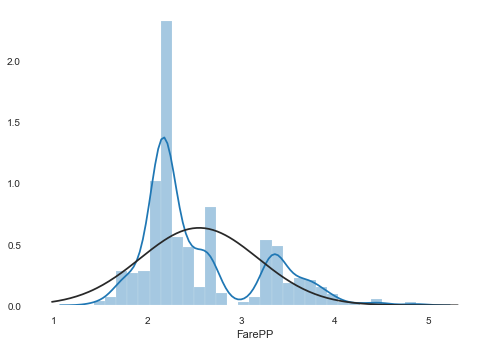

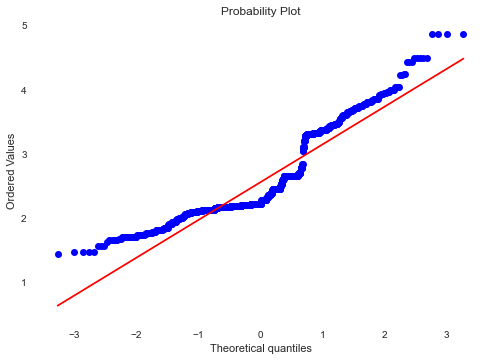

In [30]:
#applying log transformation
all_data['FarePP'] = np.log1p(all_data['FarePP'])

#histogram and normal probability plot
sns.distplot(all_data['FarePP'], fit=norm);
fig = plt.figure()
res = stats.probplot(all_data['FarePP'], plot=plt)

In [31]:
all_data.describe(include='all')

,Survived,Pclass,Sex,Age,Cabin,Embarked,FarePP,FamilySize,Title
count,891.000000,1309.000000,1309,1046.000000,295,1309,1309.000000,1309.000000,1309
unique,NaN,NaN,2,NaN,186,3,NaN,NaN,5
top,NaN,NaN,male,NaN,C23 C25 C27,S,NaN,NaN,Mr
freq,NaN,NaN,843,NaN,6,914,NaN,NaN,757
mean,0.383838,2.294882,NaN,29.881138,NaN,NaN,2.549005,1.779221,NaN
std,0.486592,0.837836,NaN,14.413493,NaN,NaN,0.629856,1.548205,NaN
min,0.000000,1.000000,NaN,0.170000,NaN,NaN,1.428108,1.000000,NaN
25%,0.000000,2.000000,NaN,21.000000,NaN,NaN,2.157559,1.000000,NaN
50%,0.000000,3.000000,NaN,28.000000,NaN,NaN,2.209647,1.000000,NaN
75%,1.000000,3.000000,NaN,39.000000,NaN,NaN,2.808149,2.000000,NaN


In [32]:
all_data = MultiColumnLabelEncoder(columns=['Sex']).fit_transform(all_data)
all_data = pd.get_dummies(all_data, columns = ['Pclass', 'Title', 'Embarked'])

all_data.head()

,Survived,Sex,Age,Cabin,FarePP,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,NaN,2.110213,1,0,0,1,0,0,1,0,0,0,0,1
1,1.0,0,38.0,C85,3.601186,2,1,0,0,0,0,0,1,0,1,0,0
2,1.0,0,26.0,NaN,2.188856,1,0,0,1,0,1,0,0,0,0,0,1
3,1.0,0,35.0,C123,3.316003,2,1,0,0,0,0,0,1,0,0,0,1
4,0.0,1,35.0,NaN,2.202765,1,0,0,1,0,0,1,0,0,0,0,1


&lt;matplotlib.legend.Legend at 0x7fe90ae495e0&gt;

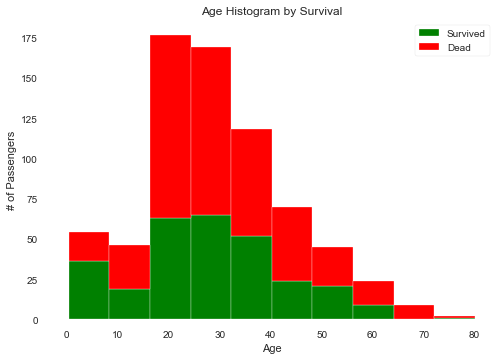

In [33]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe90b176190&gt;

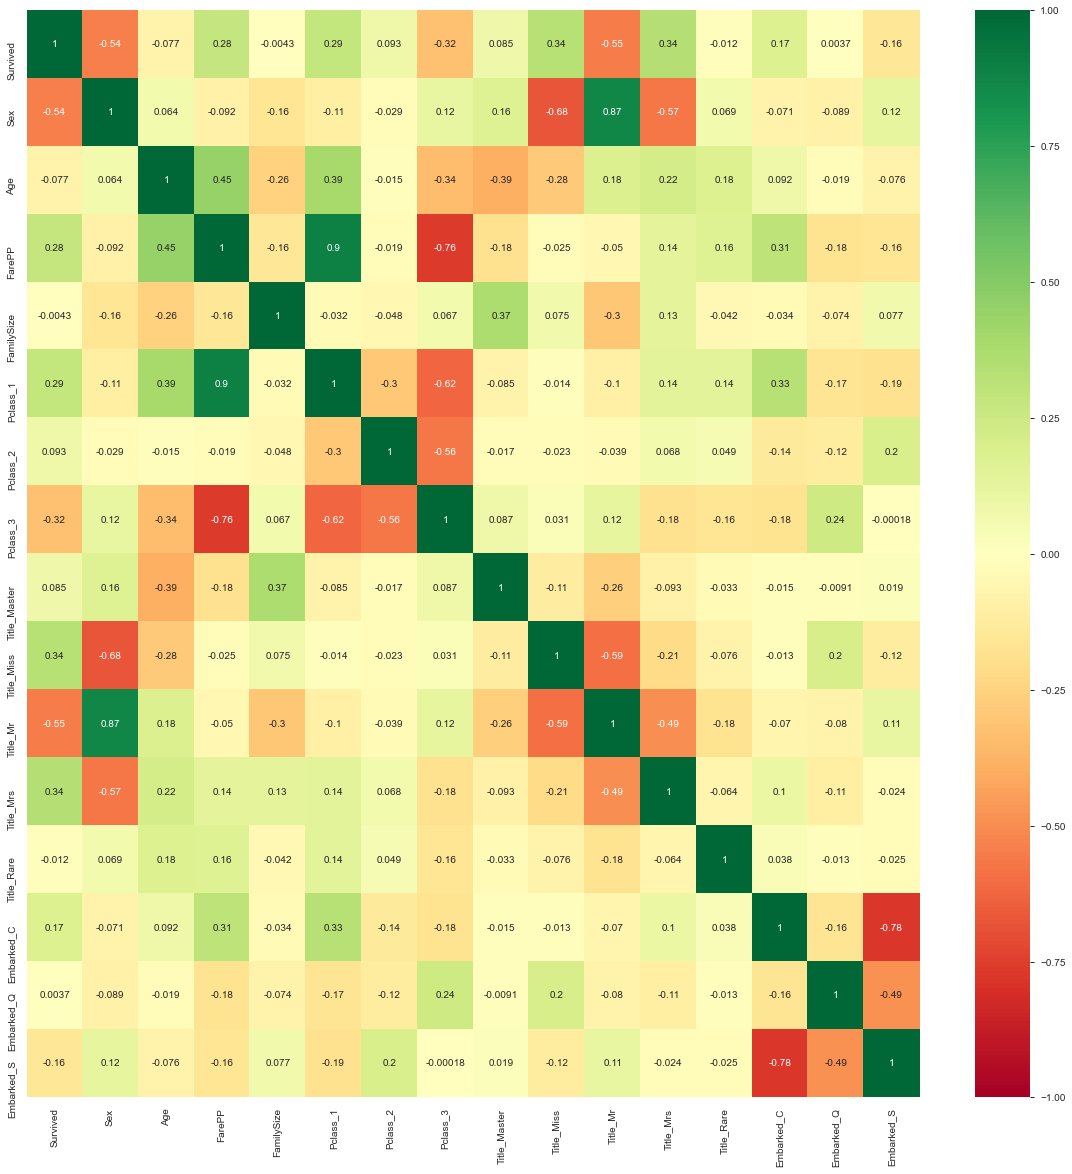

In [34]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [35]:
all_data_age = all_data.copy()

all_data_WithAge = all_data_age[pd.isnull(all_data_age['Age']) == False]
all_data_WithoutAge = all_data_age[pd.isnull(all_data_age['Age'])]

In [36]:
from sklearn.ensemble import RandomForestRegressor

use_Arguments = ['FarePP', 'FamilySize', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

rfModel_age = RandomForestRegressor(random_state=42)

rfModel_age.fit (all_data_WithAge[use_Arguments], all_data_WithAge['Age'])

age_Values = rfModel_age.predict(X = all_data_WithoutAge[use_Arguments])

print(age_Values)

[27.527      31.49027996 39.84884615 27.25699892 21.5637619  27.90144002
 52.68       27.77902155 24.2836798  27.90144002 29.4044444  38.73335043
 27.77902155 25.35851435 38.2795     35.98408333  6.35221667 27.90144002
 29.4044444  24.47041991 29.4044444  29.4044444  27.90144002 27.36796648
 16.08       29.4044444  36.21085595  4.10784    29.35       29.01131847
 24.78568536 11.4355     50.79507143 50.58765476  4.69199841 12.6043
 32.208      49.42666667 31.82949495 36.21085595 27.77902155 31.666
 36.21085595 27.90144002  6.63549286 21.88       15.10116667 13.64916667
 29.44220452 53.713      36.21085595 27.77902155 32.138      27.77902155
 29.09504762 44.64585365 35.98408333 41.89361111 27.77902155 37.40214209
 27.778287   29.4044444  29.82       31.666       5.38824    42.2
 27.90144002 23.4665     57.88416667 27.25699892 21.5637619  21.5637619
 38.73335043 30.46666667 27.77902155 29.28       27.90144002 26.82214935
  6.63549286 27.90144002 27.34       29.09504762 28.33276923 27.9014

In [37]:
all_data_WithoutAge['Age'] = age_Values.astype(float)

all_data.update(all_data_WithoutAge['Age'])

all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   Cabin         295 non-null    object 
 4   FarePP        1309 non-null   float64
 5   FamilySize    1309 non-null   int64  
 6   Pclass_1      1309 non-null   uint8  
 7   Pclass_2      1309 non-null   uint8  
 8   Pclass_3      1309 non-null   uint8  
 9   Title_Master  1309 non-null   uint8  
 10  Title_Miss    1309 non-null   uint8  
 11  Title_Mr      1309 non-null   uint8  
 12  Title_Mrs     1309 non-null   uint8  
 13  Title_Rare    1309 non-null   uint8  
 14  Embarked_C    1309 non-null   uint8  
 15  Embarked_Q    1309 non-null   uint8  
 16  Embarked_S    1309 non-null   uint8  
dtypes: float64(3), int64(2), object(1), uint8(11)
memory usag

In [38]:
all_data.describe()

,Survived,Sex,Age,FarePP,FamilySize,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,0.644003,29.854720,2.549005,1.779221,0.246753,0.211612,0.541635,0.046600,0.201681,0.578304,0.151261,0.022154,0.207792,0.093965,0.698243
std,0.486592,0.478997,13.615859,0.629856,1.548205,0.431287,0.408607,0.498454,0.210862,0.401408,0.494019,0.358440,0.147242,0.405882,0.291891,0.459196
min,0.000000,0.000000,0.170000,1.428108,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,2.157559,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,28.000000,2.209647,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,37.000000,2.808149,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,4.860450,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


&lt;matplotlib.legend.Legend at 0x7fe90b19a730&gt;

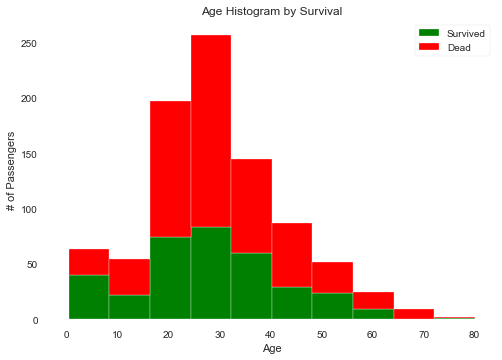

In [39]:
plt.hist(x = [all_data[all_data['Survived']==1]['Age'],
        all_data[all_data['Survived']==0]['Age']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

In [40]:
#all_data['AgeBand'] = pd.cut(all_data['Age'], 8)

#all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

all_data['IsChild'] = np.where(all_data['Age'] < 18, 1, 0)

all_data[['IsChild', 'Survived']].groupby(['IsChild'], as_index=False).mean().sort_values(by='IsChild', ascending=True)

all_data['IsElderly'] = np.where(all_data['Age'] >= 60, 1, 0)

all_data[['IsElderly', 'Survived']].groupby(['IsElderly'], as_index=False).mean().sort_values(by='IsElderly', ascending=True)

&lt;matplotlib.legend.Legend at 0x7fe90acb7280&gt;

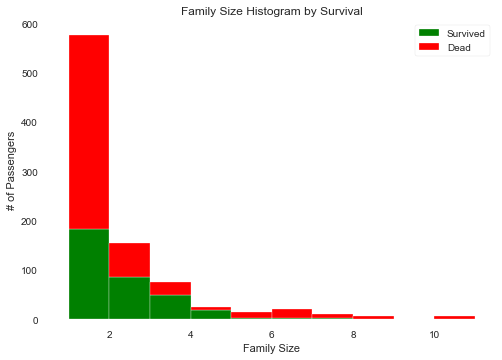

In [41]:
plt.hist(x = [all_data[all_data['Survived']==1]['FamilySize'],
        all_data[all_data['Survived']==0]['FamilySize']],
        stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()

In [42]:
all_data['IsAlone'] = np.where(all_data['FamilySize'] == 1, 1, 0)

all_data['SmallFamily']   = all_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)

all_data['LargeFamily'] = np.where(all_data['FamilySize'] > 4, 1, 0)


In [43]:
all_data['WandCGroup'] = 0 # add a class column with 0 as default value

# find all rows that fulfills your conditions and set class to 1
all_data.loc[(all_data['Sex'] == 0) & (all_data['FamilySize'] > 1), 'WandCGroup'] = 1 # then set class to 1

all_data.loc[(all_data['Title_Master'] == 1) & (all_data['FamilySize'] > 1), 'WandCGroup'] = 1

all_data[['WandCGroup', 'Survived']].groupby(['WandCGroup'], as_index=False).mean().sort_values(by='WandCGroup', ascending=False)

,WandCGroup,Survived
1,1,0.678049
0,0,0.295918


In [44]:
#all_data = pd.get_dummies(all_data, columns = ['FamilySize'])

In [45]:
all_data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   Cabin         295 non-null    object 
 4   FarePP        1309 non-null   float64
 5   FamilySize    1309 non-null   int64  
 6   Pclass_1      1309 non-null   uint8  
 7   Pclass_2      1309 non-null   uint8  
 8   Pclass_3      1309 non-null   uint8  
 9   Title_Master  1309 non-null   uint8  
 10  Title_Miss    1309 non-null   uint8  
 11  Title_Mr      1309 non-null   uint8  
 12  Title_Mrs     1309 non-null   uint8  
 13  Title_Rare    1309 non-null   uint8  
 14  Embarked_C    1309 non-null   uint8  
 15  Embarked_Q    1309 non-null   uint8  
 16  Embarked_S    1309 non-null   uint8  
 17  IsAlone       1309 non-null   int64  
 18  SmallFamily   

In [46]:
#all_data['FamilyBand'] = pd.cut(all_data['FamilySize'], 11)

#all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

In [47]:
#all_data = MultiColumnLabelEncoder(columns=['FamilyBand']).fit_transform(all_data)

#all_data[['FamilyBand', 'Survived']].groupby(['FamilyBand'], as_index=False).mean().sort_values(by='FamilyBand', ascending=True)

In [48]:
#sns.barplot(all_data['FamilyBand'], all_data['Survived']);

In [49]:
#all_data = pd.get_dummies(all_data, columns = ['FamilyBand'])

In [50]:
#all_data['Pclass*Fare'] = all_data['Pclass'] * all_data['FareBand']
#all_data['Pclass*Age'] = all_data['Pclass'] * all_data['AgeBand']
#all_data['Title*Fare'] = all_data['Title'] * all_data['FareBand']
#all_data['Title*Age'] = all_data['Title'] * all_data['AgeBand']
#all_data['Title*Class'] = all_data['Title'] * all_data['Pclass']
#all_data['Embarked*Fare'] = all_data['Embarked'] * all_data['FareBand']
#all_data['Embarked*Class'] = all_data['Embarked'] * all_data['Pclass']
#all_data['Embarked*Age'] = all_data['Embarked'] * all_data['AgeBand']
#all_data['Embarked*Title'] = all_data['Embarked'] * all_data['Title']

#all_data = pd.get_dummies(all_data, columns = ['Title', 'Embarked', 'Pclass'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe90ac9a8b0&gt;

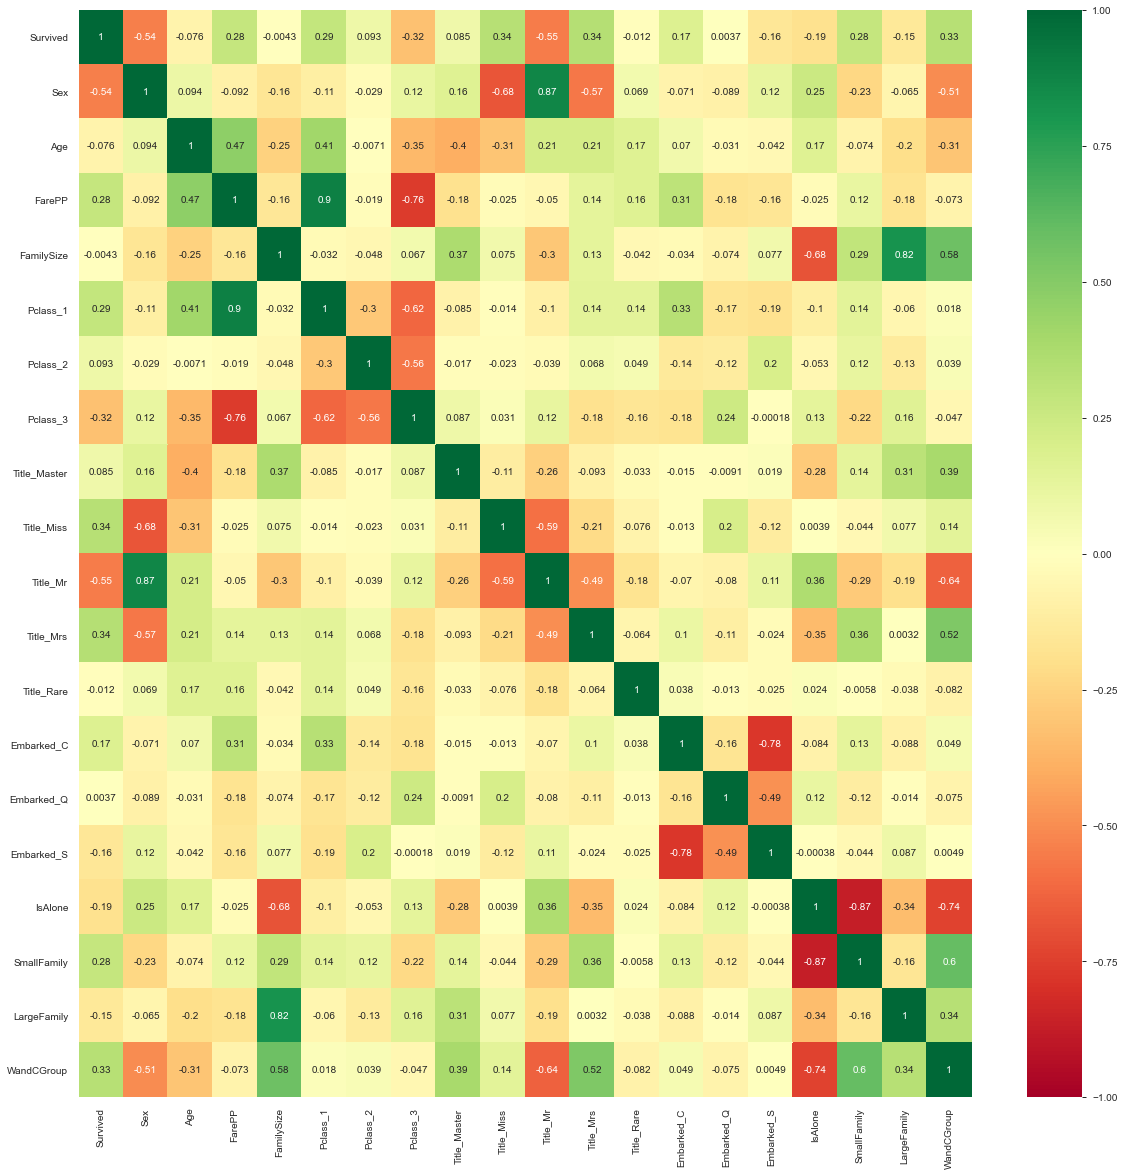

In [51]:
corr_matrix = all_data.corr()

plt.figure (figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

In [57]:
#all_data.drop(['Age','Sex','FamilySize'], axis=1, inplace=True)
all_data.drop(['Cabin'], axis=1, inplace=True)

In [58]:
train = all_data[:ntrain]
test = all_data[ntrain:]

test.drop(['Survived'], axis=1, inplace=True)

In [59]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import accuracy_score

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Scale data
#scaler = StandardScaler().fit(test)
#scaler = MinMaxScaler().fit(test)
#scaled_test = scaler.transform(test)

#imputed_test = pd.DataFrame(scaled_test)
#imputed_test.columns = test.columns


#Scale data
#scaler = StandardScaler().fit(train)
#scaler = MinMaxScaler().fit(train)
#scaled_train = scaler.transform(train)

#imputed_train = pd.DataFrame(scaled_train)
#imputed_train.columns = train.columns

y = train.Survived

#imputed_train.drop(['Survived'], axis=1, inplace=True)

X = train.drop(['Survived'], 1)
#X = imputed_train

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

           Specs       Score
6       Title_Mr  112.805785
7      Title_Mrs   89.474177
5     Title_Miss   79.531749
15    WandCGroup   75.028601
1       Pclass_1   55.175151
13   SmallFamily   48.568177
3       Pclass_3   41.553071
9     Embarked_C   22.009402
14   LargeFamily   17.544354
0         FarePP   11.015171
12       IsAlone   10.847576
4   Title_Master    6.180425
2       Pclass_2    6.160767
11    Embarked_S    5.984840
8     Title_Rare    0.126121
10    Embarked_Q    0.010847


In [62]:
#use_features = ['Title_Mrs', 'Title_Miss', 'WandCGroup', 'Pclass_1', 'SmallFamily', 'Pclass_3', 'Cabin_B', 'Embarked_C', 'Cabin_Unk', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'LargeFamily', 'IsAlone']

#X = X[use_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.2)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe8f19597f0&gt;

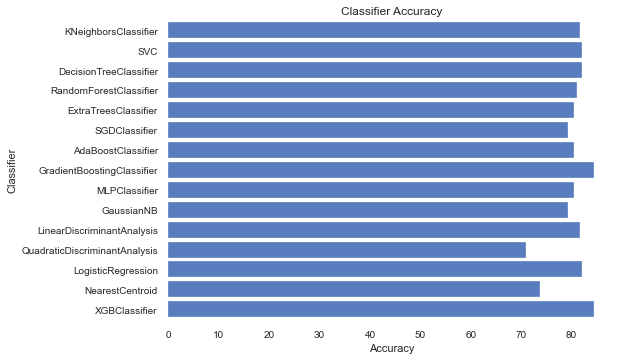

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='auto'),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    SGDClassifier(random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(max_iter = 1000, random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear'),
    NearestCentroid(),
    XGBClassifier(objective="binary:logistic", random_state=42)
    ]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(train_X, train_y)
    train_predictions = clf.predict(val_X)
    acc = accuracy_score(val_y, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] * 100.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [64]:
log.groupby(['Classifier'], as_index=False).mean().sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
4,GradientBoostingClassifier,84.357542
14,XGBClassifier,84.357542
1,DecisionTreeClassifier,82.122905
7,LogisticRegression,82.122905
13,SVC,82.122905
5,KNeighborsClassifier,81.564246
6,LinearDiscriminantAnalysis,81.564246
11,RandomForestClassifier,81.005587
0,AdaBoostClassifier,80.446927
2,ExtraTreesClassifier,80.446927


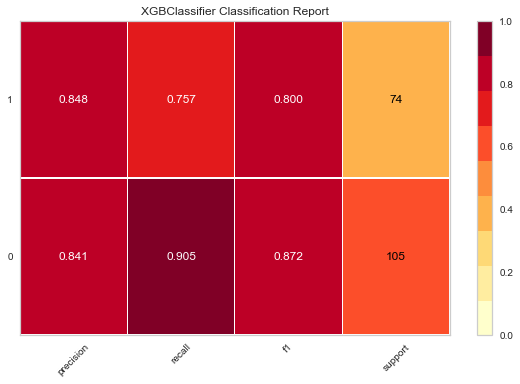

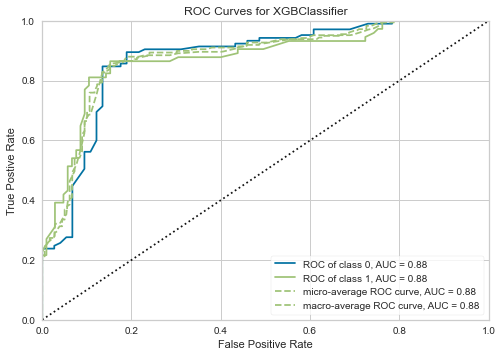

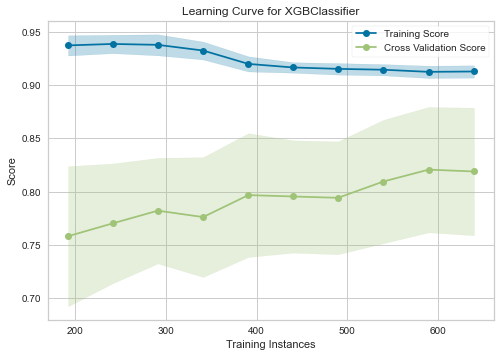

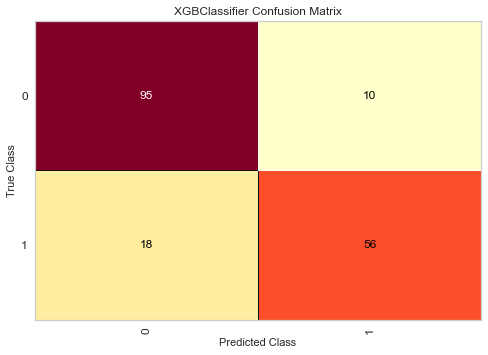

&lt;Figure size 576x396 with 0 Axes&gt;

In [65]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix

classes = ["0", "1"]

# Instantiate the classification model and visualizer
model = XGBClassifier(objective="binary:logistic", random_state=42)

visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(train_X, train_y)        # Fit the visualizer and the model
visualizer.score(val_X, val_y)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#ROCAUC
#roc_auc(model, train_X, train_y, X_test=val_X, y_test=val_y, classes=classes)
roc_auc(model, train_X, train_y, val_X, val_y, classes=classes)

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate visualizer
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Instantiate confusion matrix
confusion_matrix(
    model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [66]:
pred = visualizer.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       113
         1.0       0.76      0.85      0.80        66

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.84      0.85       179



The following is for XGBoost only

In [70]:
#model = XGBClassifier(objective="binary:logistic", random_state=42)
model = XGBClassifier(objective="binary:logistic", random_state=42, colsample_bytree= 0.74, gamma= 0.07, learning_rate= 0.32, max_depth= 3, n_estimators= 129, subsample= 0.62)

model.fit(train_X, train_y,early_stopping_rounds=100, eval_set=[(val_X, val_y)])

xgb_prediction = model.predict(val_X)

print(classification_report(xgb_prediction, val_y))

[0]	validation_0-error:0.19553
Will train until validation_0-error hasn&#39;t improved in 100 rounds.
[1]	validation_0-error:0.18994
[2]	validation_0-error:0.17877
[3]	validation_0-error:0.17877
[4]	validation_0-error:0.18436
[5]	validation_0-error:0.17877
[6]	validation_0-error:0.17877
[7]	validation_0-error:0.17877
[8]	validation_0-error:0.18436
[9]	validation_0-error:0.18436
[10]	validation_0-error:0.18994
[11]	validation_0-error:0.17318
[12]	validation_0-error:0.17318
[13]	validation_0-error:0.18994
[14]	validation_0-error:0.17877
[15]	validation_0-error:0.17877
[16]	validation_0-error:0.18994
[17]	validation_0-error:0.18436
[18]	validation_0-error:0.18436
[19]	validation_0-error:0.18436
[20]	validation_0-error:0.18436
[21]	validation_0-error:0.18436
[22]	validation_0-error:0.18436
[23]	validation_0-error:0.18436
[24]	validation_0-error:0.17877
[25]	validation_0-error:0.17877
[26]	validation_0-error:0.17318
[27]	validation_0-error:0.17877
[28]	validation_0-error:0.17318
[29]	valida

In [68]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(model, param_distributions=params, random_state=42, n_iter=200, cv=10, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Model with rank: 1
Mean validation score: 0.841 (std: 0.032)
Parameters: {&#39;colsample_bytree&#39;: 0.7415059277253404, &#39;gamma&#39;: 0.0663727111214849, &#39;learning_rate&#39;: 0.32086106013424764, &#39;max_depth&#39;: 3, &#39;n_estimators&#39;: 129, &#39;subsample&#39;: 0.6164270067071503}

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  1.2min finished


from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(10)
#Instantiate RFECV visualizer
visualizer = RFECV(model, cv=cv, scroring='f1-weighted', step=1)

visualizer.fit(train_X, train_y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [71]:
#final_model=visualizer.rfe_estimator_
final_model=model

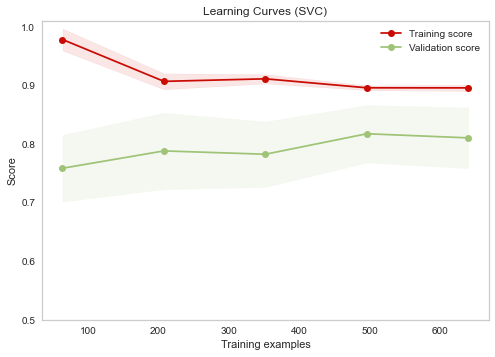

In [72]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (SVC)"
cv = 10
plot_learning_curve(final_model, title, train_X, train_y, ylim=(0.5, 1.01), cv=cv, n_jobs=1);


In [73]:
pred = final_model.predict(val_X)
print(classification_report(pred, val_y))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       108
         1.0       0.80      0.83      0.81        71

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.85      0.85      0.85       179



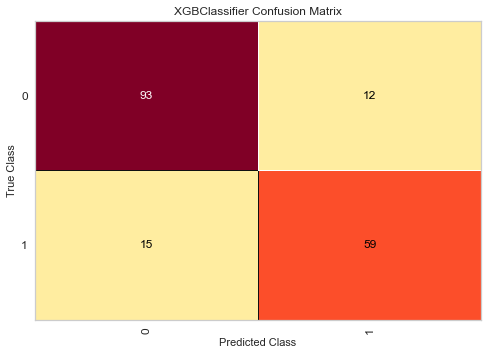

&lt;Figure size 576x396 with 0 Axes&gt;

In [74]:
# Instantiate confusion matrix
confusion_matrix(
   final_model,
    train_X, train_y, val_X, val_y,
    classes=classes
)
plt.tight_layout()

In [75]:
pred = final_model.predict(test)

submission = pd.DataFrame({'PassengerId':submissionIds['PassengerId'], 'Survived':pred})

submission['PassengerId'] = submission['PassengerId'].astype('int')
submission['Survived'] = submission['Survived'].astype('int')

filename = 'Titanic Prediction.csv'

submission.to_csv(filename, index=False)

In [76]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_model, random_state=42).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.2324 ± 0.0559,Title_Mr
0.0592 ± 0.0230,FarePP
0.0413 ± 0.0261,Pclass_3
0.0223 ± 0.0187,LargeFamily
0.0179 ± 0.0084,Title_Rare
0.0134 ± 0.0230,IsAlone
0.0123 ± 0.0130,Title_Miss
0.0112 ± 0.0187,WandCGroup
0.0101 ± 0.0179,Embarked_C
0.0089 ± 0.0114,Title_Mrs


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(val_X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[4,:], val_X.iloc[4,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, val_X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, val_X)

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, val_X, plot_type="bar")

'Title_Mr', 'Pclass_3', 'Sex', 'Cabin_Unk', 'Fare', 'Age', 'Title_Mrs', 'LargeFamily', 'Embarked_S', 'Embarked_C', 'Pclass_1', 'IsAlone', 'Cabin_E', 'SmallFamily', 'Title_Rare', 'Cabin_C', 'Title_Master', 'Title_Miss', 'Cabin_D', 'IsChild'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

In [ ]:
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
model.add(Dense(32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=300)

In [ ]:
pred = model.predict_classes(val_X)
print(metrics.accuracy_score(val_y, pred))

In [ ]:
print(classification_report(pred, val_y))

In [ ]:
history=model.fit(train_X, train_y, validation_split=0.25, epochs=300, batch_size=32, verbose=0)

print(history.history.keys())

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [ ]:
pred = model.predict_classes(test)

submission['PassengerId'] = submissionIds['PassengerId'].astype('int')
submission['Survived'] = pred.astype('int')

filename = 'Titanic Prediction TF.csv'

submission.to_csv(filename, index=False)